<a href="https://colab.research.google.com/github/jpm3003Copilot/DETI/blob/main/ML_Express_Bootcamp_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Projet ML Express – Prédiction d’achat client

Dans ce notebook, nous allons prédire si un client achètera ou non un produit à partir de ses données de navigation sur un site e-commerce.

## Les 7 étapes d’un projet de Machine Learning

Un projet de machine learning bien structuré suit généralement les étapes suivantes :

### 1. Compréhension du problème
- Identifier l’objectif métier ou la question à résoudre.
- Déterminer le type de problème : classification, régression, clustering, etc.
- Définir la variable cible (à prédire) et les variables explicatives.

### 2. Collecte des données
- Rassembler les données nécessaires à partir de sources internes ou externes.
- Formats possibles : CSV, bases SQL, API, fichiers logs, données web, etc.

### 3. Exploration et nettoyage des données (Data preprocessing)
- Identifier les valeurs manquantes, doublons, incohérences.
- Corriger ou supprimer les anomalies.
- Convertir les formats si nécessaire (dates, booléens, catégoriques…).

### 4. Analyse exploratoire (EDA - Exploratory Data Analysis)
- Étudier les distributions, les corrélations, les tendances.
- Utiliser des visualisations pour mieux comprendre les relations entre variables.
- Générer des hypothèses pour la modélisation.

### 5. Modélisation
- Choisir un ou plusieurs algorithmes adaptés (logistic regression, SVM, arbre, etc.).
- Séparer les données en ensembles d’entraînement et de test (train/test split).
- Entraîner les modèles sur les données d’apprentissage.

### 6. Évaluation du modèle
- Mesurer les performances : accuracy, precision, recall, F1-score, AUC, etc.
- Comparer plusieurs modèles ou variantes.
- Détecter les éventuels sur/apprentissages (overfitting/underfitting).

### 7. Déploiement et valorisation
- Préparer le modèle pour une utilisation réelle (API, application, dashboard…).
- Documenter le projet et publier le code si nécessaire (GitHub, portfolio).
- Suivre les performances du modèle dans le temps (monitoring, feedback).

---

Chaque étape est essentielle pour garantir la fiabilité, la reproductibilité et l’impact concret du projet.


## Description du dataset : Online Shoppers Purchasing Intention

Le dataset **Online Shoppers Purchasing Intention** contient 12 330 enregistrements de sessions de navigation web collectés sur un site e-commerce pendant un an.  
Chaque ligne correspond à une session distincte, attribuée à un visiteur unique, ce qui permet d’éviter les biais liés aux utilisateurs récurrents ou aux campagnes ciblées.

Ce jeu de données a été publié en 2017 par **Sakar et al.**, sous licence **CC BY 4.0**, et est largement utilisé pour l’évaluation de modèles de classification supervisée sur des données tabulaires indépendantes et identiquement distribuées (i.i.d).



### Caractéristiques (features)

#### Variables numériques (10)

- `Administrative`, `Informational`, `ProductRelated` : nombre de pages consultées dans chaque catégorie.
- `Administrative_Duration`, `Informational_Duration`, `ProductRelated_Duration` : durée totale (en secondes) passée sur les pages correspondantes.
- `BounceRates`, `ExitRates` : taux de rebond et taux de sortie moyens pour chaque session.
- `PageValues` : estimation de la valeur monétaire moyenne des pages précédant un achat.
- `SpecialDay` : variable comprise entre 0 et 1 indiquant la proximité de la session avec un jour commercial spécial (ex. Saint-Valentin).

#### Variables catégorielles (7)

- `Month` : mois de la session (janvier à décembre)
- `OperatingSystems` : identifiants numériques (1 à 8)
- `Browser` : identifiants (1 à 13)
- `Region` : régions géographiques (1 à 9)
- `TrafficType` : source de trafic (1 à 20)
- `VisitorType` : `"New_Visitor"`, `"Returning_Visitor"`, `"Other"`
- `Weekend` : booléen indiquant si la session a eu lieu un week-end (`TRUE` ou `FALSE`)



### Cible

- `Revenue` : indique si la session a généré un achat (`TRUE`) ou non (`FALSE`)




In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Importation des bibliothèques principales
import pandas as pd   # pd est l'alias standard pour la bibliothèque pandas, utilisée pour manipuler et analyser des données structurées (ex : tableaux, DataFrames)
import numpy as np    # np est l'alias standard pour NumPy, utilisé pour les calculs numériques et la gestion des tableaux multidimensionnels


## Etape 2:  Chargement des données

In [4]:
# Remplacer par le chemin réel du dataset si nécessaire
df = pd.read_csv("/online_shoppers_intention.csv")

# Aperçu des données
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
# Infos générales
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           



# Etape 3:  Exploration et nettoyage des données (Data preprocessing)

- Identifier les valeurs manquantes, doublons, incohérences.
- Corriger ou supprimer les anomalies.
- Convertir les formats si nécessaire (dates, booléens, catégoriques…).


In [6]:
# Détection des valeurs manquantes
df.isnull().sum()


,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [7]:
df.describe()# description de la base de données

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Etape 4 Analyse exploratoire (EDA - Exploratory Data Analysis)
- Étudier les distributions, corrélation etc
-  Utiliser des visualisations pour mieux comprendre les relations entre variables.
- Générer des hypothèses pour la modélisation et choisir les variables

## Analyse de la distribution

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyser_toutes_variables_numeriques(df):
    """
    Analyse automatiquement toutes les colonnes numériques d'un DataFrame.
    Affiche les statistiques descriptives, le boxplot et l'histogramme avec KDE pour chaque variable.
    """
    colonnes_numeriques = df.select_dtypes(include=['int64', 'float64']).columns

    if colonnes_numeriques.empty:
        print("Aucune colonne numérique détectée.")
        return

    for col in colonnes_numeriques:
        print(f"\n{'='*60}\nAnalyse de la variable : {col}\n{'='*60}")

        # Statistiques de base
        stats = df[col].describe()
        mediane = df[col].median()
        print(f"\nStatistiques descriptives :\n{stats}")
        print(f"Médiane : {mediane}")

        # Visualisations
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[0], color='lightblue')
        axes[0].set_title(f'Boxplot - {col}')

        # Histogramme avec densité
        sns.histplot(df[col], kde=True, bins=30, ax=axes[1], color='coral')
        axes[1].set_title(f'Histogramme - {col}')

        plt.tight_layout()
        plt.show()



Analyse de la variable : Administrative

Statistiques descriptives :
count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64
Médiane : 1.0


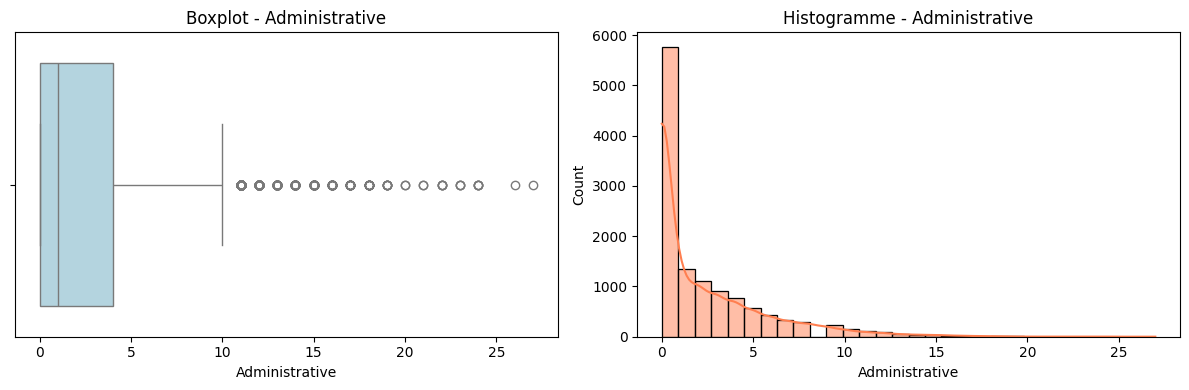


Analyse de la variable : Administrative_Duration

Statistiques descriptives :
count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64
Médiane : 7.5


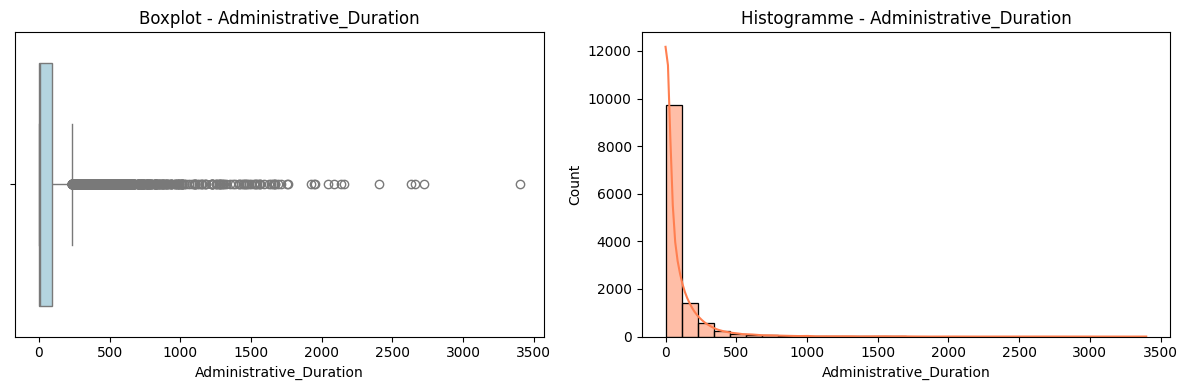


Analyse de la variable : Informational

Statistiques descriptives :
count    12330.000000
mean         0.503569
std          1.270156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64
Médiane : 0.0


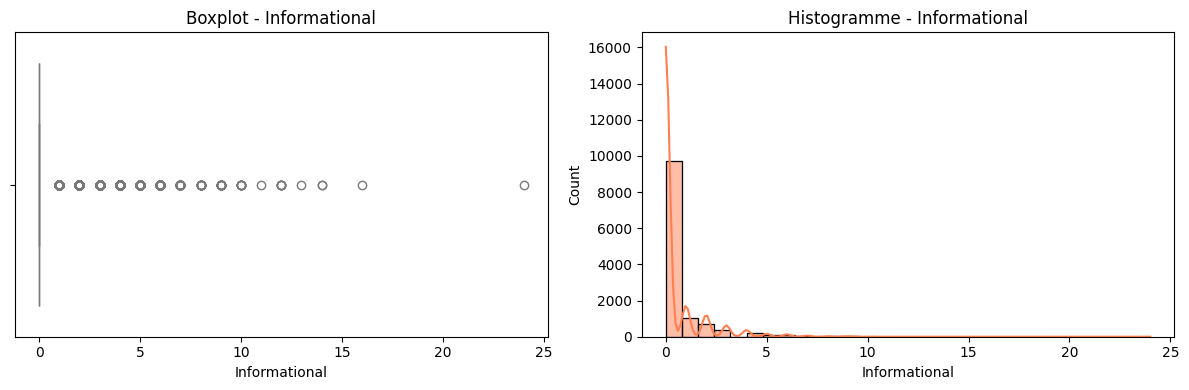


Analyse de la variable : Informational_Duration

Statistiques descriptives :
count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64
Médiane : 0.0


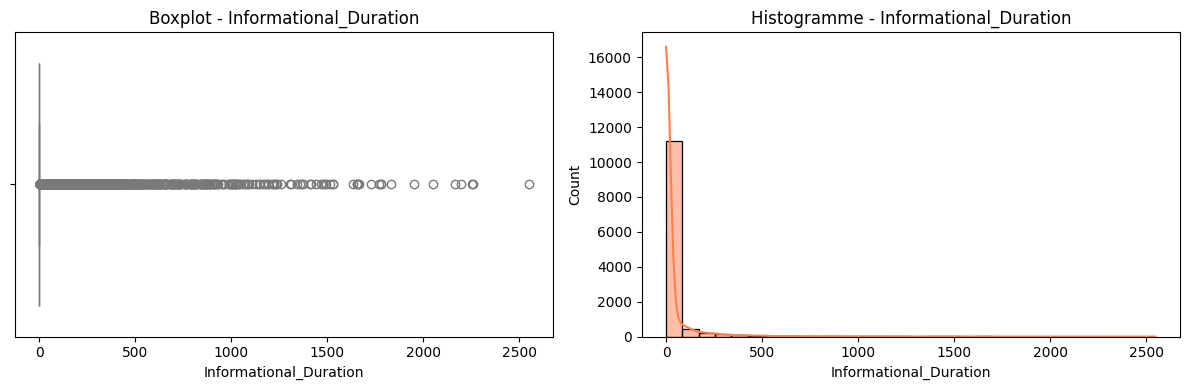


Analyse de la variable : ProductRelated

Statistiques descriptives :
count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64
Médiane : 18.0


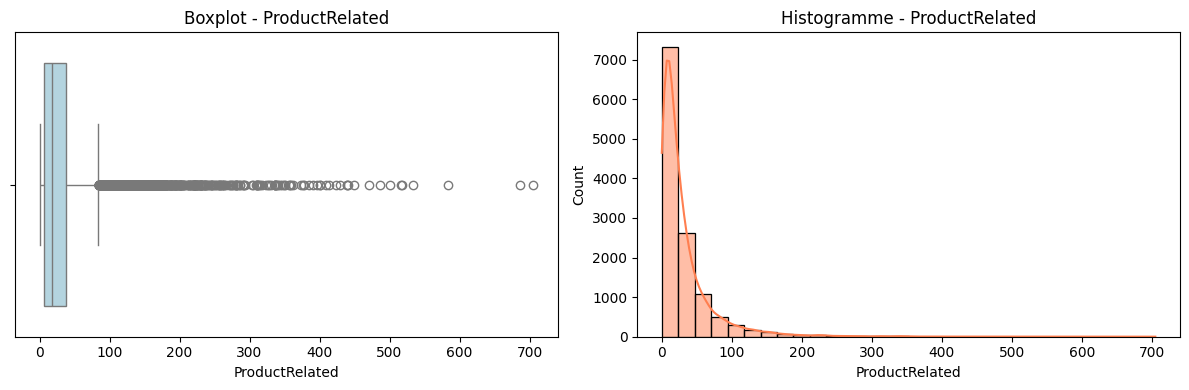


Analyse de la variable : ProductRelated_Duration

Statistiques descriptives :
count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157214
max      63973.522230
Name: ProductRelated_Duration, dtype: float64
Médiane : 598.9369047499999


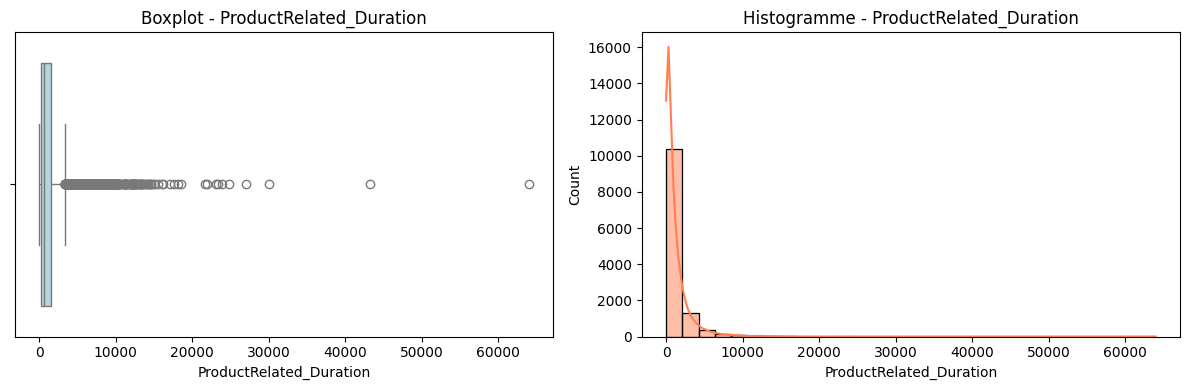


Analyse de la variable : BounceRates

Statistiques descriptives :
count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64
Médiane : 0.0031124675


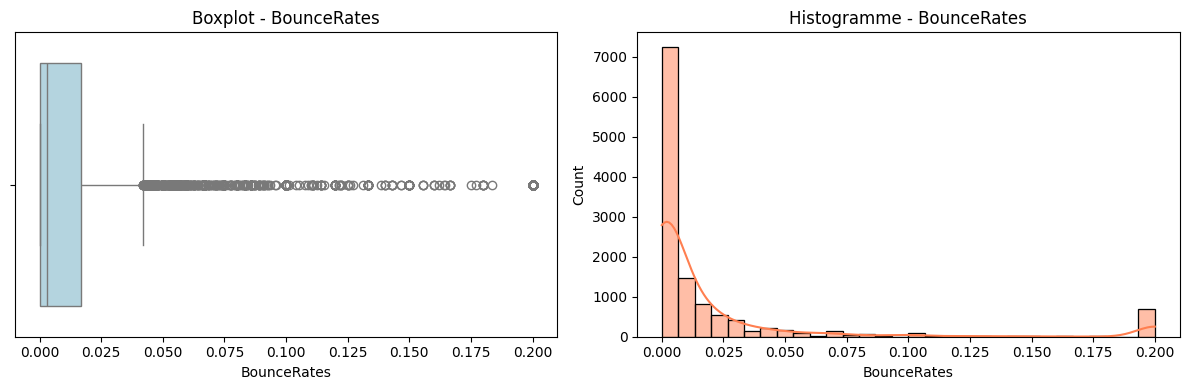


Analyse de la variable : ExitRates

Statistiques descriptives :
count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64
Médiane : 0.0251564025


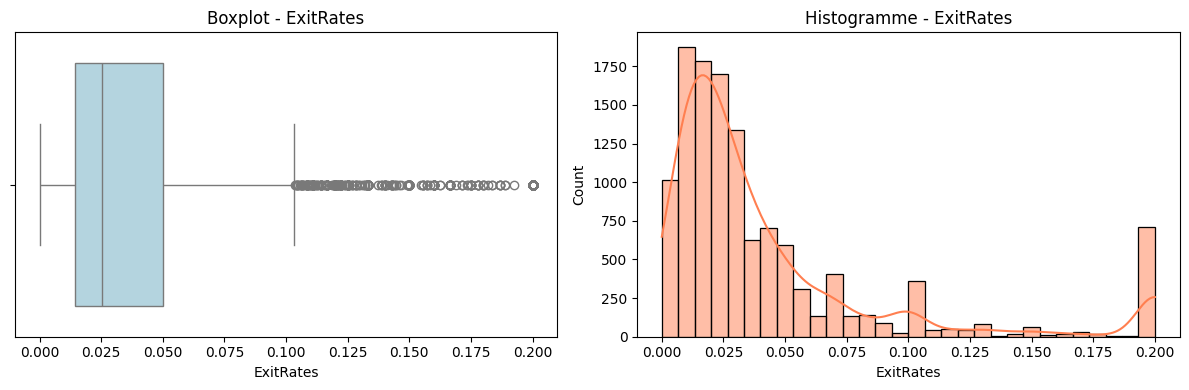


Analyse de la variable : PageValues

Statistiques descriptives :
count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64
Médiane : 0.0


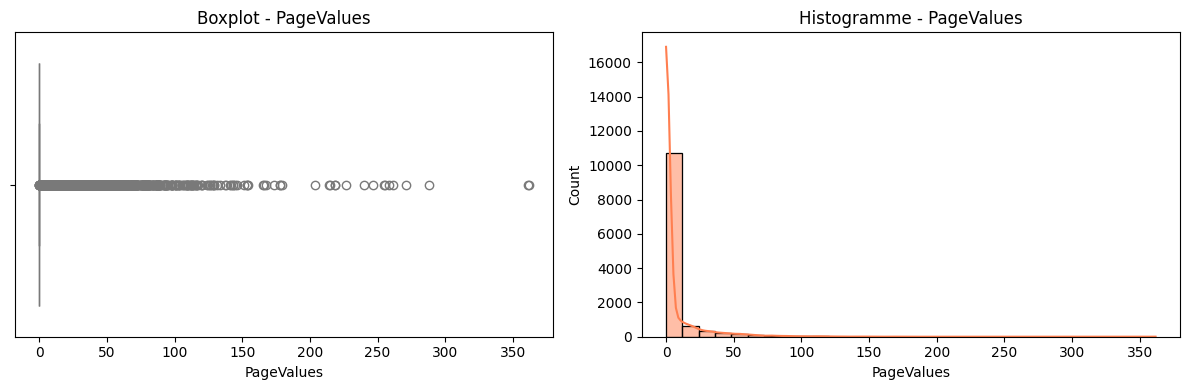


Analyse de la variable : SpecialDay

Statistiques descriptives :
count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64
Médiane : 0.0


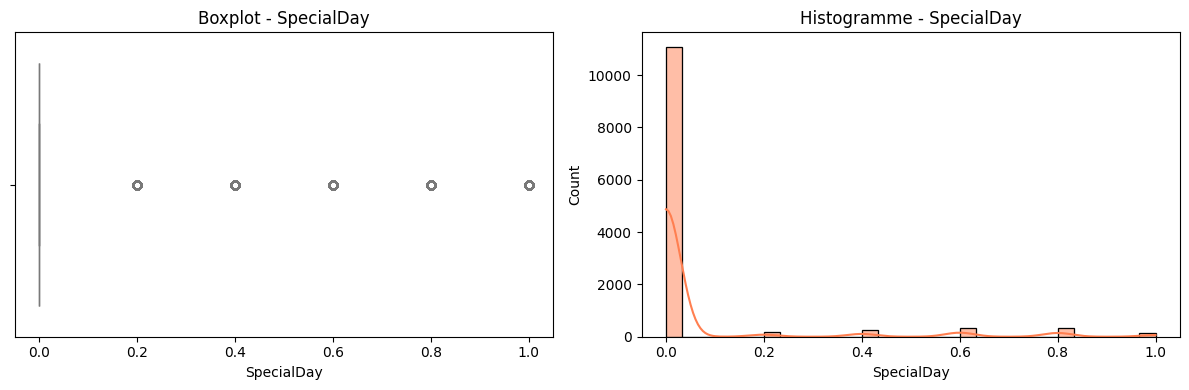


Analyse de la variable : OperatingSystems

Statistiques descriptives :
count    12330.000000
mean         2.124006
std          0.911325
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: OperatingSystems, dtype: float64
Médiane : 2.0


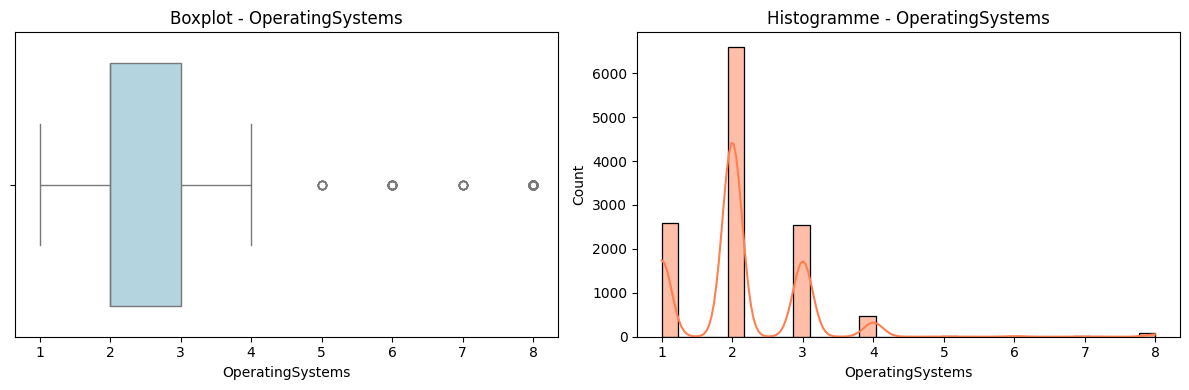


Analyse de la variable : Browser

Statistiques descriptives :
count    12330.000000
mean         2.357097
std          1.717277
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         13.000000
Name: Browser, dtype: float64
Médiane : 2.0


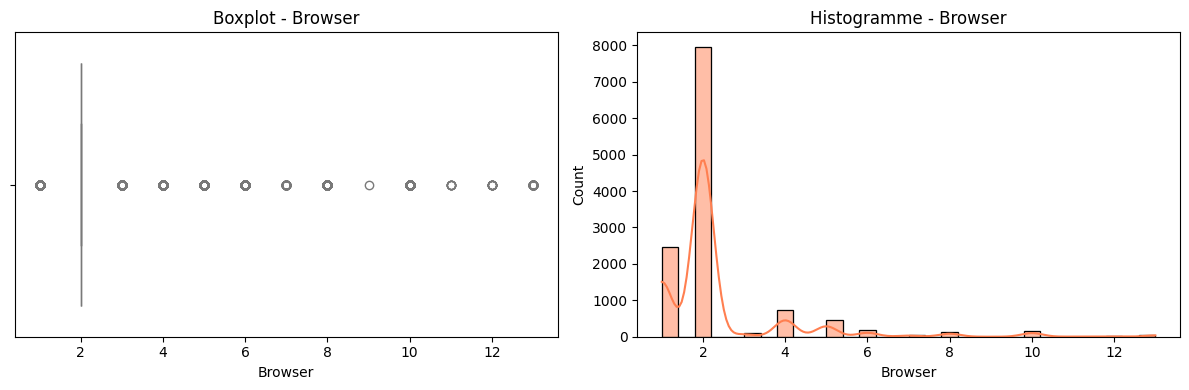


Analyse de la variable : Region

Statistiques descriptives :
count    12330.000000
mean         3.147364
std          2.401591
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: Region, dtype: float64
Médiane : 3.0


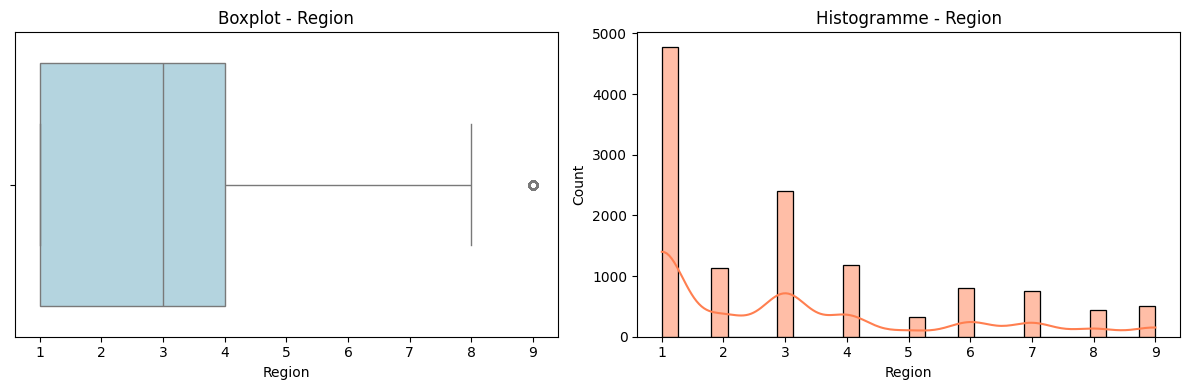


Analyse de la variable : TrafficType

Statistiques descriptives :
count    12330.000000
mean         4.069586
std          4.025169
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         20.000000
Name: TrafficType, dtype: float64
Médiane : 2.0


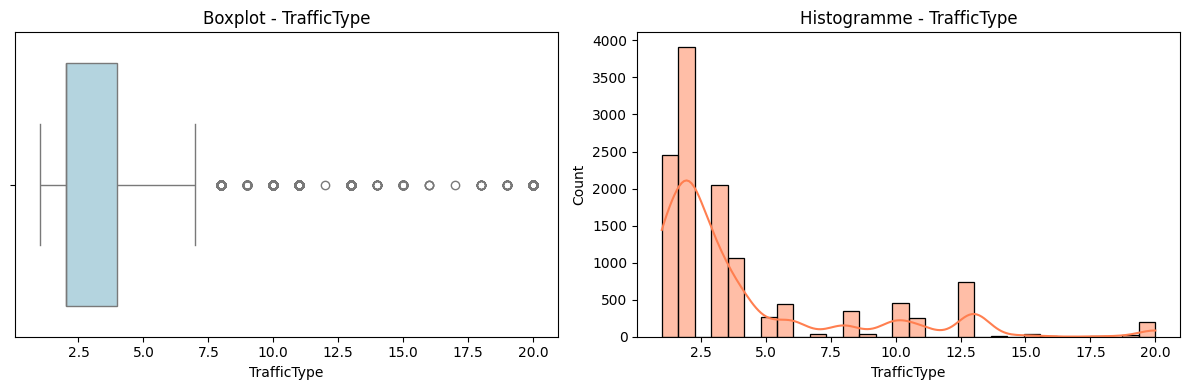

In [9]:
analyser_toutes_variables_numeriques(df)


Analyse de la variable : Month
Fréquences absolues :
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

Fréquences relatives (%) :
Month
May     27.28
Nov     24.31
Mar     15.47
Dec     14.01
Oct      4.45
Sep      3.63
Aug      3.51
Jul      3.50
June     2.34
Feb      1.49
Name: proportion, dtype: float64


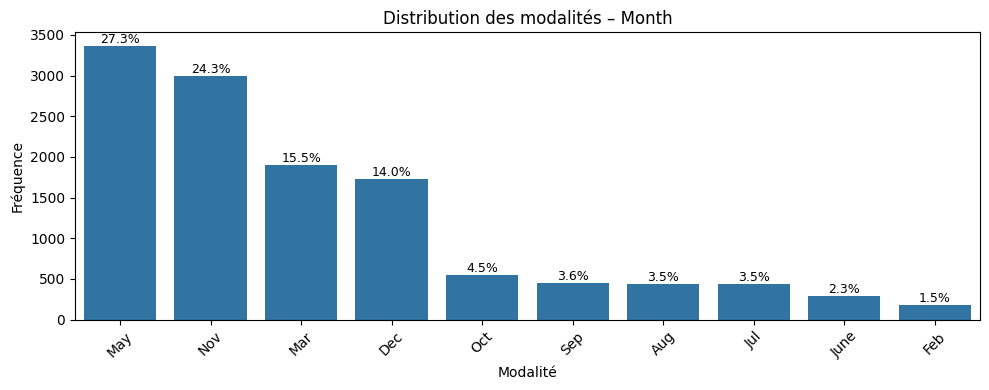


Analyse de la variable : VisitorType
Fréquences absolues :
VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

Fréquences relatives (%) :
VisitorType
Returning_Visitor    85.57
New_Visitor          13.74
Other                 0.69
Name: proportion, dtype: float64


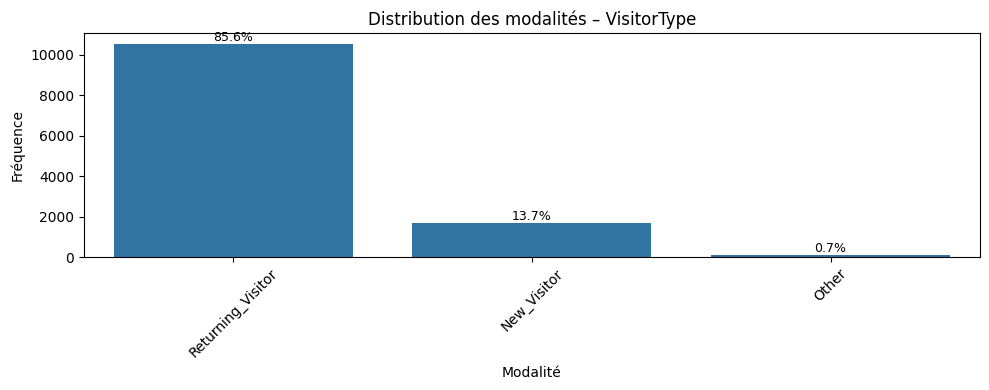


Analyse de la variable : Weekend
Fréquences absolues :
Weekend
False    9462
True     2868
Name: count, dtype: int64

Fréquences relatives (%) :
Weekend
False    76.74
True     23.26
Name: proportion, dtype: float64


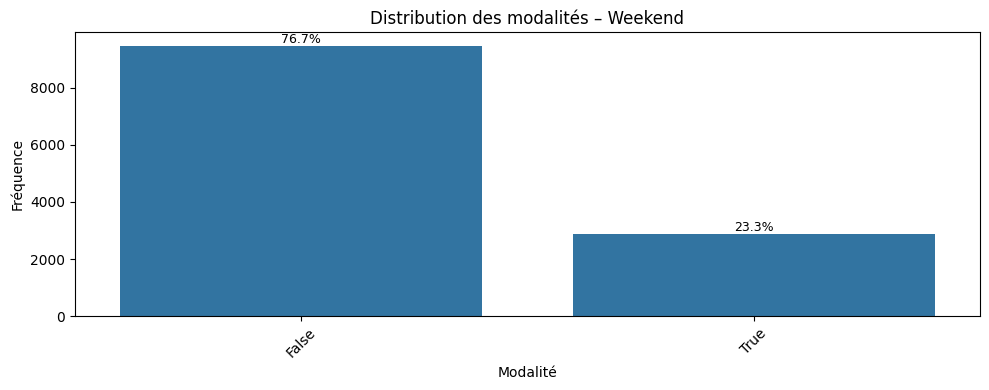


Analyse de la variable : Revenue
Fréquences absolues :
Revenue
False    10422
True      1908
Name: count, dtype: int64

Fréquences relatives (%) :
Revenue
False    84.53
True     15.47
Name: proportion, dtype: float64


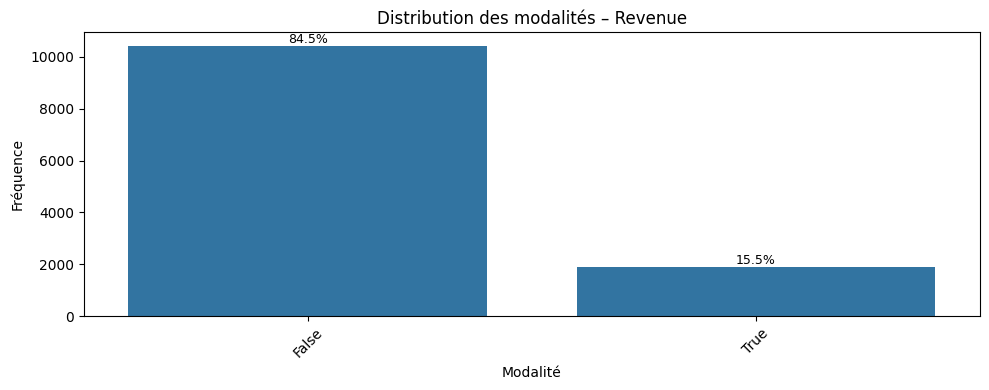

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyser_toutes_variables_qualitatives(df, max_modalites_affichees=10):
    """
    Analyse automatiquement toutes les variables qualitatives d’un DataFrame.
    Affiche les fréquences et barplots pour les modalités les plus fréquentes,
    avec les proportions (%) annotées au-dessus de chaque barre.

    Paramètres :
    - df : DataFrame pandas
    - max_modalites_affichees : nombre maximal de modalités à afficher dans les barplots
    """
    colonnes_categoriques = df.select_dtypes(include=['object', 'category', 'bool']).columns

    if colonnes_categoriques.empty:
        print("Aucune variable qualitative détectée.")
        return

    for col in colonnes_categoriques:
        print(f"\n{'='*60}\nAnalyse de la variable : {col}\n{'='*60}")

        # Fréquences
        freq_abs = df[col].value_counts()
        freq_rel = df[col].value_counts(normalize=True) * 100

        print("Fréquences absolues :")
        print(freq_abs)
        print("\nFréquences relatives (%) :")
        print(freq_rel.round(2))

        # Préparation du top des modalités
        top_modalites = freq_abs.head(max_modalites_affichees).reset_index()
        top_modalites.columns = [col, 'Fréquence']
        top_modalites['Pourcentage'] = (top_modalites['Fréquence'] / df.shape[0] * 100).round(1)

        # Affichage du barplot
        plt.figure(figsize=(10, 4))
        ax = sns.barplot(data=top_modalites, x=col, y='Fréquence', color='C0')
        plt.title(f'Distribution des modalités – {col}')
        plt.ylabel("Fréquence")
        plt.xlabel("Modalité")
        plt.xticks(rotation=45)

        # Ajouter les annotations en pourcentage sur chaque barre
        for i, row in top_modalites.iterrows():
            ax.text(i, row['Fréquence'], f"{row['Pourcentage']}%", ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()


analyser_toutes_variables_qualitatives(df)

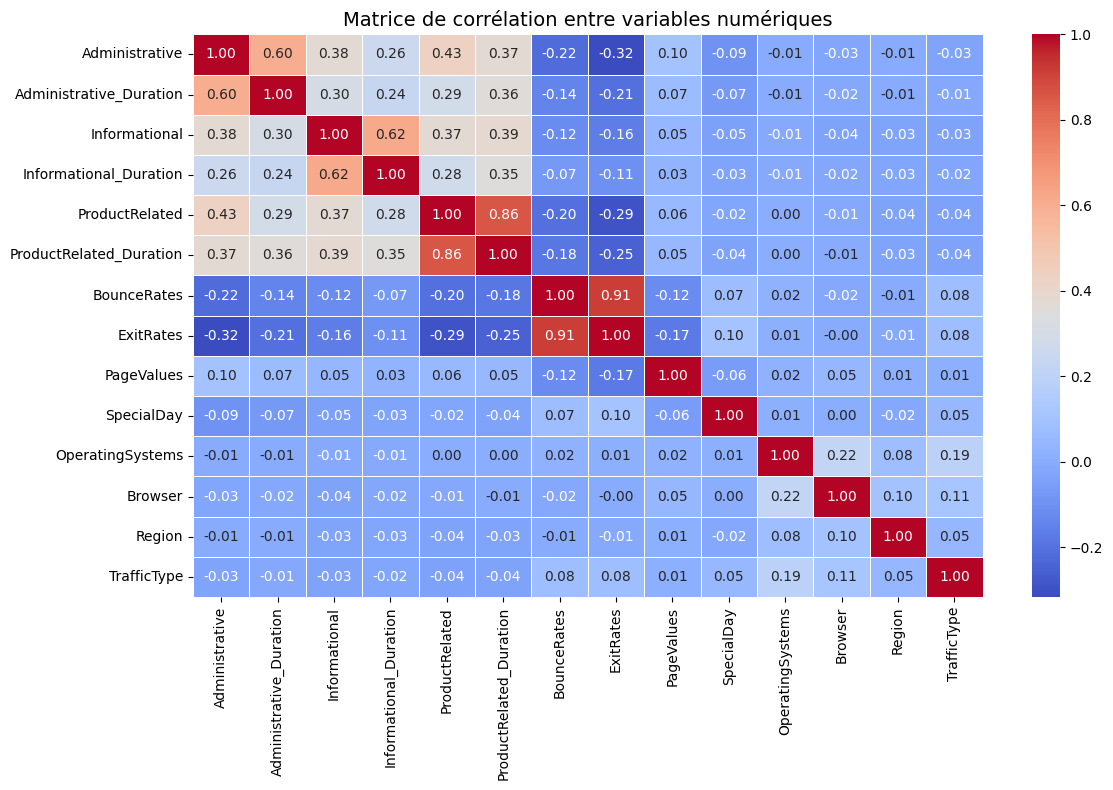

In [11]:
# Analyse de la corrélation entre les varaibles numériques

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def afficher_heatmap_correlation(df, figsize=(12, 8), annot=True, cmap='coolwarm'):
    """
    Affiche la heatmap de corrélation entre les variables numériques d’un DataFrame.

    Paramètres :
    - df : DataFrame pandas
    - figsize : taille de la figure (largeur, hauteur)
    - annot : afficher les coefficients dans la heatmap
    - cmap : palette de couleurs utilisée
    """
    # Sélection des variables numériques uniquement
    df_num = df.select_dtypes(include=['float64', 'int64'])

    if df_num.shape[1] < 2:
        print("Pas assez de variables numériques pour afficher une matrice de corrélation.")
        return

    # Calcul de la matrice de corrélation
    corr_matrix = df_num.corr()

    # Affichage de la heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=annot, cmap=cmap, linewidths=0.5, fmt=".2f")
    plt.title("Matrice de corrélation entre variables numériques", fontsize=14)
    plt.tight_layout()
    plt.show()

afficher_heatmap_correlation(df)


## Analyse des relations entre les variables

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def analyse_bivariee_avec_cible(df, cible='Revenue', alpha=0.05):
    """
    Analyse la relation entre une variable cible binaire et toutes les variables numériques.
    Affiche : boxplots, stats descriptives par groupe, test de Student, et un graphique résumé.

    Paramètres :
    - df : DataFrame
    - cible : nom de la variable cible binaire (ex: 'Revenue')
    - alpha : seuil de signification statistique pour le t-test
    """

    # Vérification que la cible existe
    if cible not in df.columns:
        print(f"La colonne '{cible}' n'existe pas dans le DataFrame.")
        return

    # Vérification que la cible est binaire
    if df[cible].nunique() != 2:
        print(f"La variable '{cible}' doit contenir exactement deux modalités.")
        return

    # Conversion de la cible en int si ce n'est pas déjà le cas
    if not pd.api.types.is_numeric_dtype(df[cible]):
        df[cible] = df[cible].astype(int)

    # Sélection des variables numériques (hors cible)
    colonnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    if cible in colonnes_numeriques:
        colonnes_numeriques.remove(cible)

    if not colonnes_numeriques:
        print("Aucune variable numérique à analyser.")
        return

    t_stats = {}

    for col in colonnes_numeriques:
        print(f"\n{'='*60}\nAnalyse de la variable : {col}\n{'='*60}")

        # Boxplot bivarié sans warning
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=cible, y=col, hue=cible, palette="pastel", legend=False)
        plt.title(f'{col} par groupe de {cible}')
        plt.xlabel(cible)
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

        # Statistiques descriptives par groupe
        stats_groupes = df.groupby(cible)[col].describe()
        print("Statistiques descriptives par groupe :\n", stats_groupes)

        # Test de Student
        groupe0 = df[df[cible] == 0][col].dropna()
        groupe1 = df[df[cible] == 1][col].dropna()
        t_stat, p_val = ttest_ind(groupe0, groupe1, equal_var=False)

        print(f"T-statistic : {t_stat:.3f} | p-value : {p_val:.3f}")
        if p_val < alpha:
            print(f"➡️ Différence significative entre les groupes (p < {alpha})")
        else:
            print(f"➡️ Pas de différence significative (p ≥ {alpha})")

        t_stats[col] = abs(t_stat)

    # Affichage final des variables triées par importance statistique
    t_stats_sorted = pd.Series(t_stats).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=t_stats_sorted.values, y=t_stats_sorted.index, color='C0')  # Correction ici
    plt.title("Variables les plus discriminantes (test de Student)")
    plt.xlabel("Valeur absolue de la t-statistic")
    plt.ylabel("Variable")
    plt.axvline(x=2, color='red', linestyle='--', label='Seuil t ≈ 2')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return t_stats_sorted



Analyse de la variable : Administrative


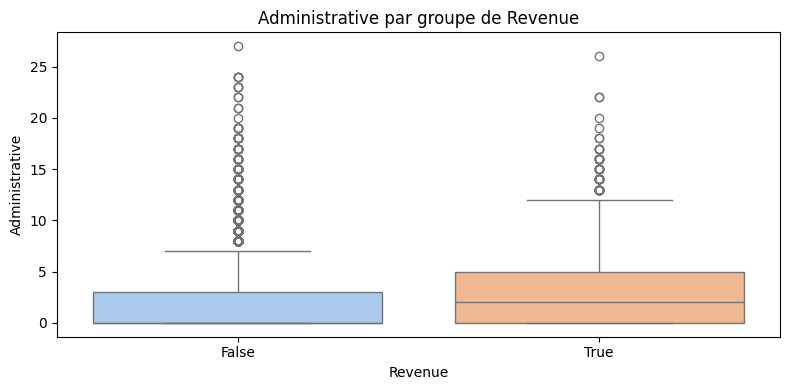

Statistiques descriptives par groupe :
            count      mean       std  min  25%  50%  75%   max
Revenue                                                       
False    10422.0  2.117732  3.202481  0.0  0.0  0.0  3.0  27.0
True      1908.0  3.393606  3.730527  0.0  0.0  2.0  5.0  26.0
T-statistic : -14.023 | p-value : 0.000
➡️ Différence significative entre les groupes (p < 0.05)

Analyse de la variable : Administrative_Duration


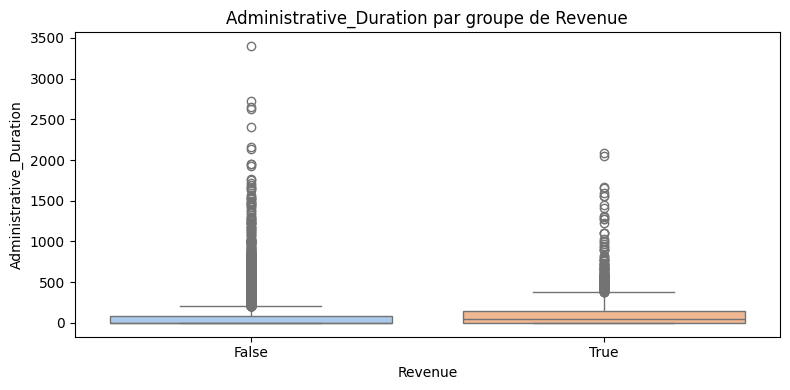

Statistiques descriptives par groupe :
            count        mean         std  min  25%        50%         75%  \
Revenue                                                                     
False    10422.0   73.740111  171.017970  0.0  0.0   0.000000   83.000000   
True      1908.0  119.483244  201.114732  0.0  0.0  52.366667  151.083333   

             max  
Revenue           
False    3398.75  
True     2086.75  
T-statistic : -9.336 | p-value : 0.000
➡️ Différence significative entre les groupes (p < 0.05)

Analyse de la variable : Informational


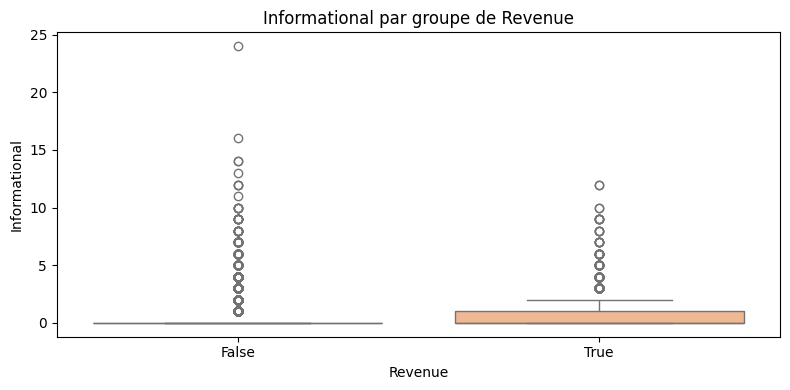

Statistiques descriptives par groupe :
            count      mean       std  min  25%  50%  75%   max
Revenue                                                       
False    10422.0  0.451833  1.211582  0.0  0.0  0.0  0.0  24.0
True      1908.0  0.786164  1.521176  0.0  0.0  0.0  1.0  12.0
T-statistic : -9.087 | p-value : 0.000
➡️ Différence significative entre les groupes (p < 0.05)

Analyse de la variable : Informational_Duration


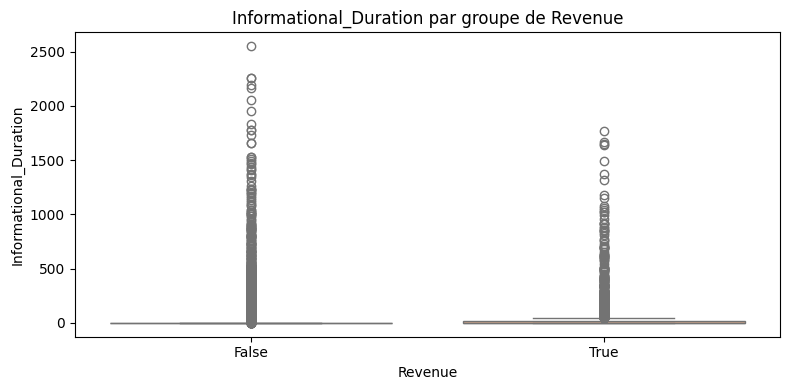

Statistiques descriptives par groupe :
            count       mean         std  min  25%  50%   75%          max
Revenue                                                                  
False    10422.0  30.236237  133.909306  0.0  0.0  0.0   0.0  2549.375000
True      1908.0  57.611427  171.619131  0.0  0.0  0.0  19.0  1767.666667
T-statistic : -6.609 | p-value : 0.000
➡️ Différence significative entre les groupes (p < 0.05)

Analyse de la variable : ProductRelated


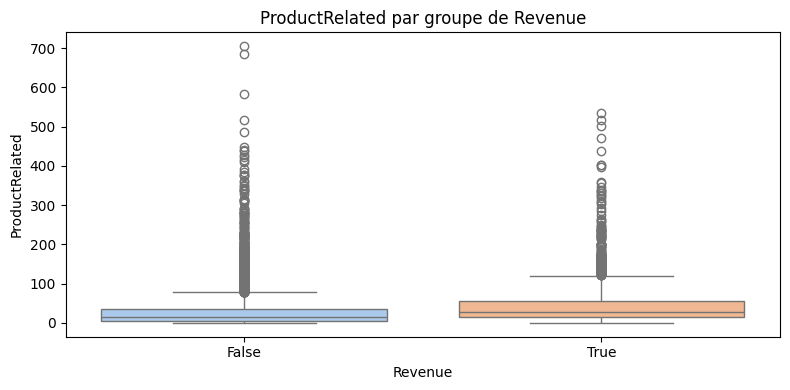

Statistiques descriptives par groupe :
            count       mean        std  min   25%   50%   75%    max
Revenue                                                             
False    10422.0  28.714642  40.744717  0.0   6.0  16.0  35.0  705.0
True      1908.0  48.210168  58.267365  0.0  15.0  29.0  57.0  534.0
T-statistic : -14.002 | p-value : 0.000
➡️ Différence significative entre les groupes (p < 0.05)

Analyse de la variable : ProductRelated_Duration


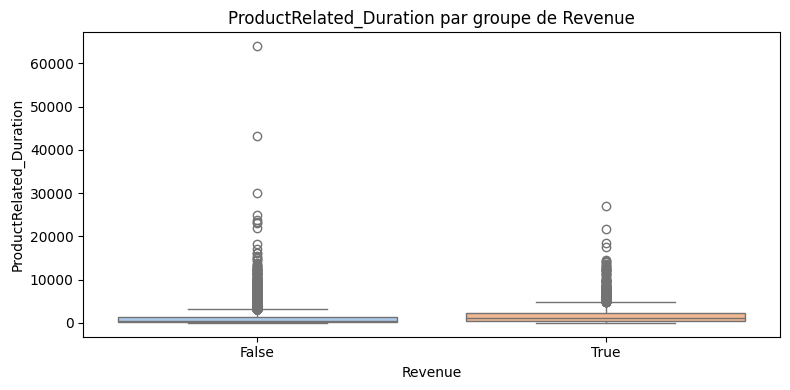

Statistiques descriptives par groupe :
            count         mean          std  min        25%         50%  \
Revenue                                                                  
False    10422.0  1069.987809  1803.797757  0.0  151.00000   510.19000   
True      1908.0  1876.209615  2312.214392  0.0  541.90625  1109.90625   

                 75%          max  
Revenue                            
False    1331.816667  63973.52223  
True     2266.011310  27009.85943  
T-statistic : -14.447 | p-value : 0.000
➡️ Différence significative entre les groupes (p < 0.05)

Analyse de la variable : BounceRates


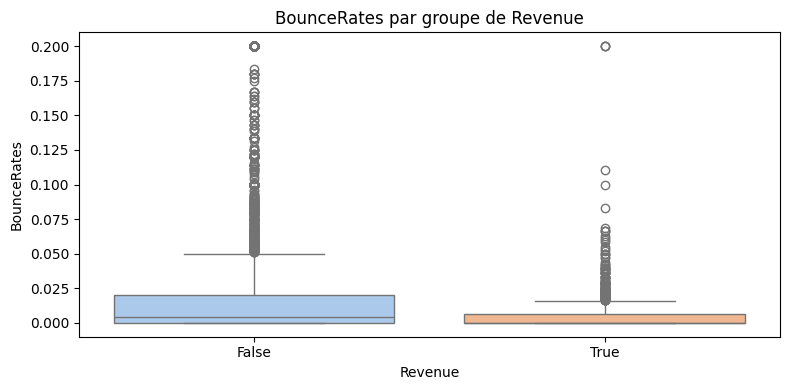

Statistiques descriptives par groupe :
            count      mean       std  min  25%       50%       75%  max
Revenue                                                                
False    10422.0  0.025317  0.051877  0.0  0.0  0.004255  0.020000  0.2
True      1908.0  0.005117  0.012185  0.0  0.0  0.000000  0.006452  0.2
T-statistic : 34.846 | p-value : 0.000
➡️ Différence significative entre les groupes (p < 0.05)

Analyse de la variable : ExitRates


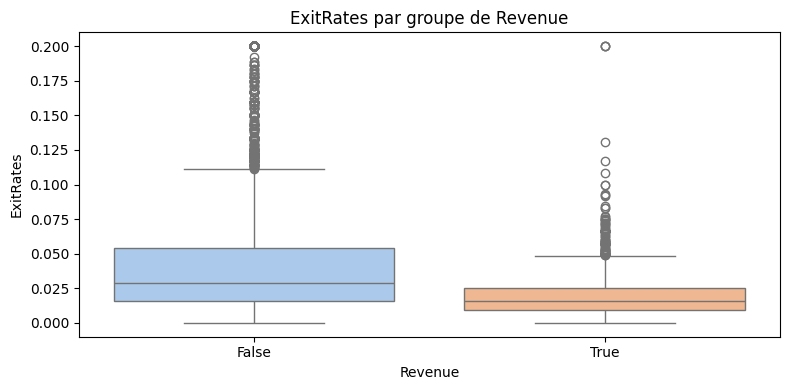

Statistiques descriptives par groupe :
            count      mean       std  min       25%       50%       75%  max
Revenue                                                                     
False    10422.0  0.047378  0.051231  0.0  0.015560  0.028571  0.053846  0.2
True      1908.0  0.019555  0.016463  0.0  0.009521  0.016000  0.025000  0.2
T-statistic : 44.332 | p-value : 0.000
➡️ Différence significative entre les groupes (p < 0.05)

Analyse de la variable : PageValues


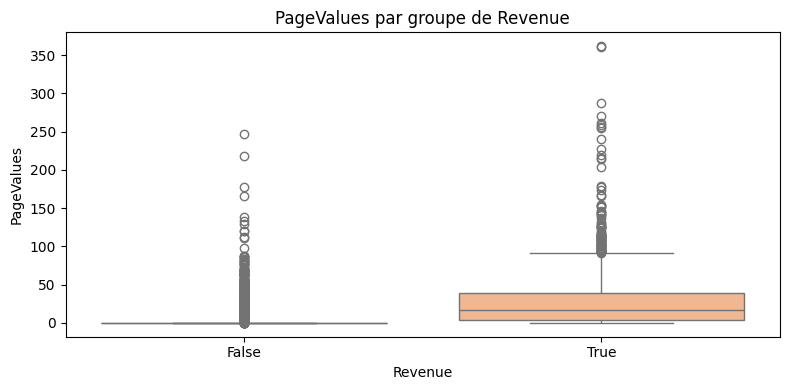

Statistiques descriptives par groupe :
            count       mean        std  min       25%        50%        75%  \
Revenue                                                                       
False    10422.0   1.975998   9.072424  0.0  0.000000   0.000000   0.000000   
True      1908.0  27.264518  35.191954  0.0  3.641144  16.758134  38.897742   

                max  
Revenue              
False    246.758590  
True     361.763742  
T-statistic : -31.199 | p-value : 0.000
➡️ Différence significative entre les groupes (p < 0.05)

Analyse de la variable : SpecialDay


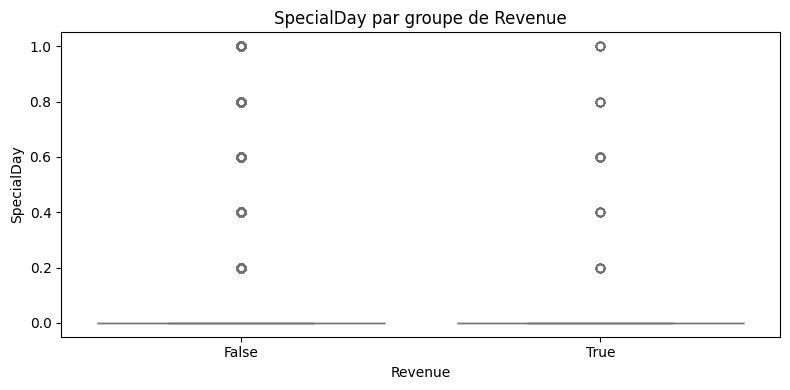

Statistiques descriptives par groupe :
            count      mean       std  min  25%  50%  75%  max
Revenue                                                      
False    10422.0  0.068432  0.209054  0.0  0.0  0.0  0.0  1.0
True      1908.0  0.023166  0.123521  0.0  0.0  0.0  0.0  1.0
T-statistic : 12.965 | p-value : 0.000
➡️ Différence significative entre les groupes (p < 0.05)

Analyse de la variable : OperatingSystems


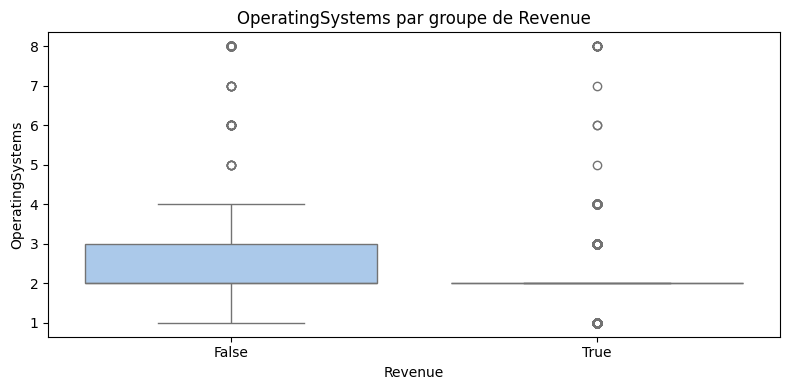

Statistiques descriptives par groupe :
            count      mean       std  min  25%  50%  75%  max
Revenue                                                      
False    10422.0  2.129726  0.907835  1.0  2.0  2.0  3.0  8.0
True      1908.0  2.092767  0.929779  1.0  2.0  2.0  2.0  8.0
T-statistic : 1.602 | p-value : 0.109
➡️ Pas de différence significative (p ≥ 0.05)

Analyse de la variable : Browser


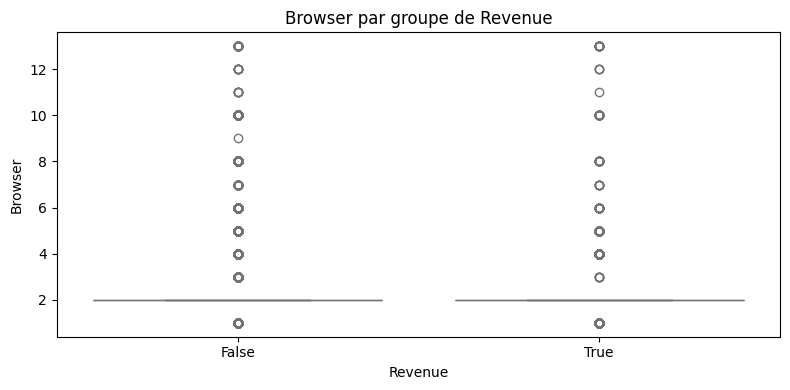

Statistiques descriptives par groupe :
            count      mean       std  min  25%  50%  75%   max
Revenue                                                       
False    10422.0  2.339474  1.681790  1.0  2.0  2.0  2.0  13.0
True      1908.0  2.453354  1.897042  1.0  2.0  2.0  2.0  13.0
T-statistic : -2.452 | p-value : 0.014
➡️ Différence significative entre les groupes (p < 0.05)

Analyse de la variable : Region


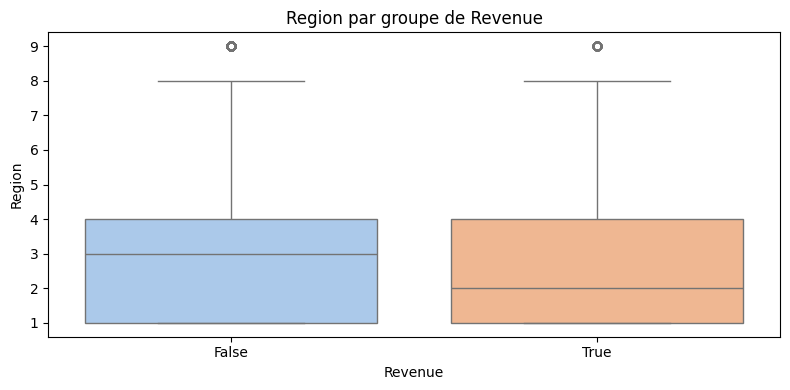

Statistiques descriptives par groupe :
            count      mean       std  min  25%  50%  75%  max
Revenue                                                      
False    10422.0  3.159278  2.400493  1.0  1.0  3.0  4.0  9.0
True      1908.0  3.082285  2.407173  1.0  1.0  2.0  4.0  9.0
T-statistic : 1.285 | p-value : 0.199
➡️ Pas de différence significative (p ≥ 0.05)

Analyse de la variable : TrafficType


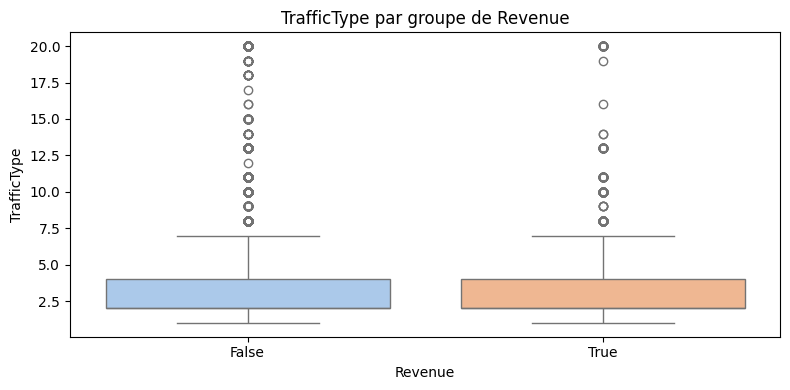

Statistiques descriptives par groupe :
            count      mean      std  min  25%  50%  75%   max
Revenue                                                      
False    10422.0  4.078392  4.03222  1.0  2.0  2.0  4.0  20.0
True      1908.0  4.021488  3.98714  1.0  2.0  2.0  4.0  20.0
T-statistic : 0.572 | p-value : 0.567
➡️ Pas de différence significative (p ≥ 0.05)


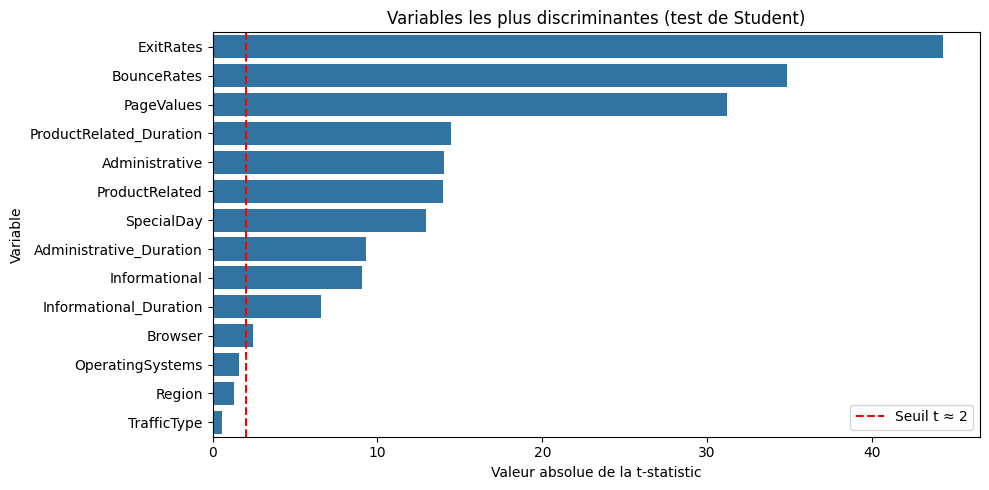

In [13]:
resultats = analyse_bivariee_avec_cible(df, cible='Revenue')


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(confusion_matrix):
    """Calcule le V de Cramér à partir d'une matrice de contingence"""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

def analyse_qualitatives_vs_cible(df, cible, alpha=0.05):
    """
    Analyse la relation entre une variable cible catégorielle et toutes les variables qualitatives.
    Affiche : tableau croisé, test du Chi², V de Cramér, barplots, classement final.

    Paramètres :
    - df : DataFrame pandas
    - cible : variable cible (catégorielle ou binaire)
    - alpha : niveau de signification (par défaut 0.05)
    """

    if cible not in df.columns:
        print(f"La colonne cible '{cible}' est absente du DataFrame.")
        return

    colonnes_qualitatives = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    if cible in colonnes_qualitatives:
        colonnes_qualitatives.remove(cible)

    if not colonnes_qualitatives:
        print("Aucune variable qualitative à analyser.")
        return

    resultats = {}

    for col in colonnes_qualitatives:
        print(f"\n{'='*60}\nAnalyse de la variable : {col}\n{'='*60}")

        # Table de contingence
        table = pd.crosstab(df[col], df[cible])
        print("Tableau croisé :\n", table)

        # Test du Chi²
        chi2, p, _, _ = chi2_contingency(table)
        v_cramer = cramers_v(table)

        print(f"Test du Chi² : Stat = {chi2:.2f} | p-value = {p:.3f}")
        print(f"V de Cramér : {v_cramer:.3f}")
        if p < alpha:
            print("➡️ Association significative (p < alpha)")
        else:
            print("➡️ Pas d’association significative (p ≥ alpha)")

        resultats[col] = v_cramer

        # Barplot groupé
        distrib = pd.crosstab(df[col], df[cible], normalize='index') * 100
        distrib.plot(kind='bar', stacked=True, figsize=(10, 4), colormap='Set2')
        plt.title(f"Répartition des modalités de {col} selon {cible}")
        plt.ylabel("Pourcentage (%)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Résumé final trié
    res = pd.Series(resultats).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=res.values, y=res.index, color='C0')
    plt.title("V de Cramér par variable catégorielle")
    plt.xlabel("V de Cramér")
    plt.ylabel("Variable")
    plt.axvline(x=0.1, color='red', linestyle='--', label='Seuil indicatif faible association')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return res



Analyse de la variable : Month
Tableau croisé :
 Revenue  False  True 
Month                
Aug        357     76
Dec       1511    216
Feb        181      3
Jul        366     66
June       259     29
Mar       1715    192
May       2999    365
Nov       2238    760
Oct        434    115
Sep        362     86
Test du Chi² : Stat = 384.93 | p-value = 0.000
V de Cramér : 0.177
➡️ Association significative (p < alpha)


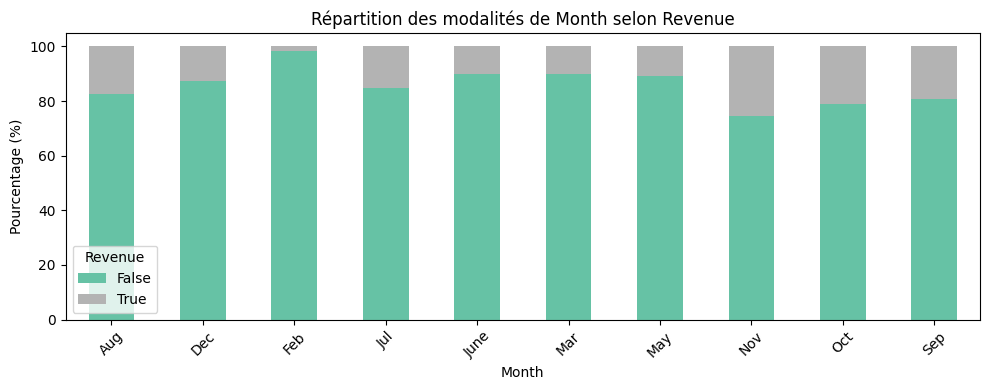


Analyse de la variable : VisitorType
Tableau croisé :
 Revenue            False  True 
VisitorType                    
New_Visitor         1272    422
Other                 69     16
Returning_Visitor   9081   1470
Test du Chi² : Stat = 135.25 | p-value = 0.000
V de Cramér : 0.105
➡️ Association significative (p < alpha)


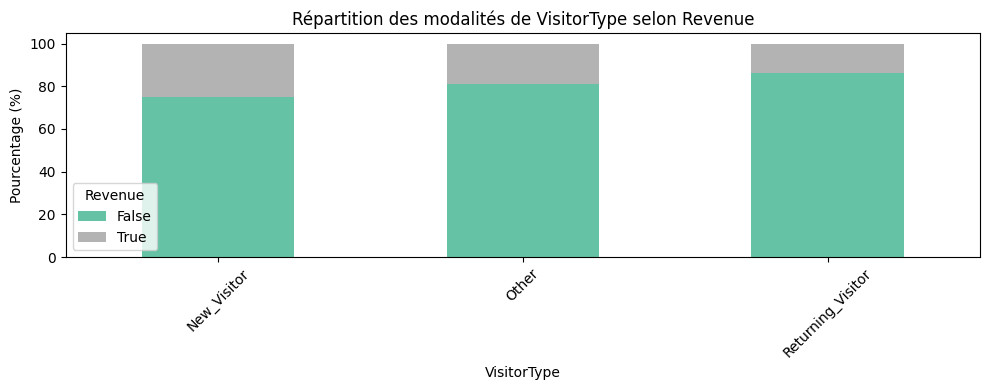


Analyse de la variable : Weekend
Tableau croisé :
 Revenue  False  True 
Weekend              
False     8053   1409
True      2369    499
Test du Chi² : Stat = 10.39 | p-value = 0.001
V de Cramér : 0.029
➡️ Association significative (p < alpha)


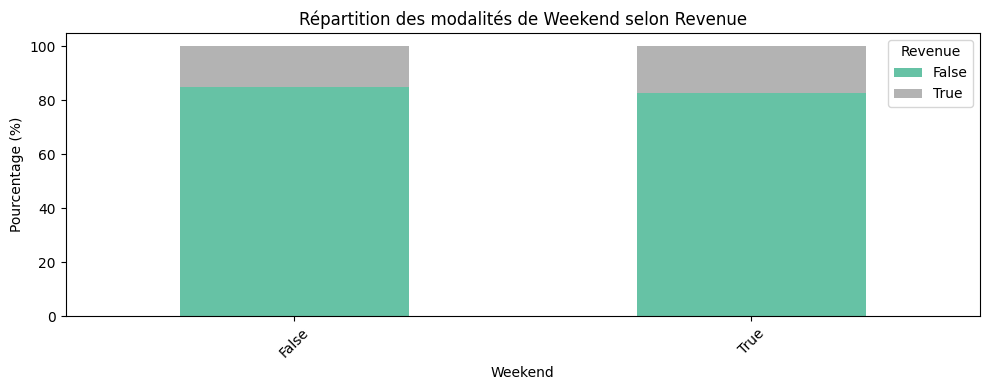

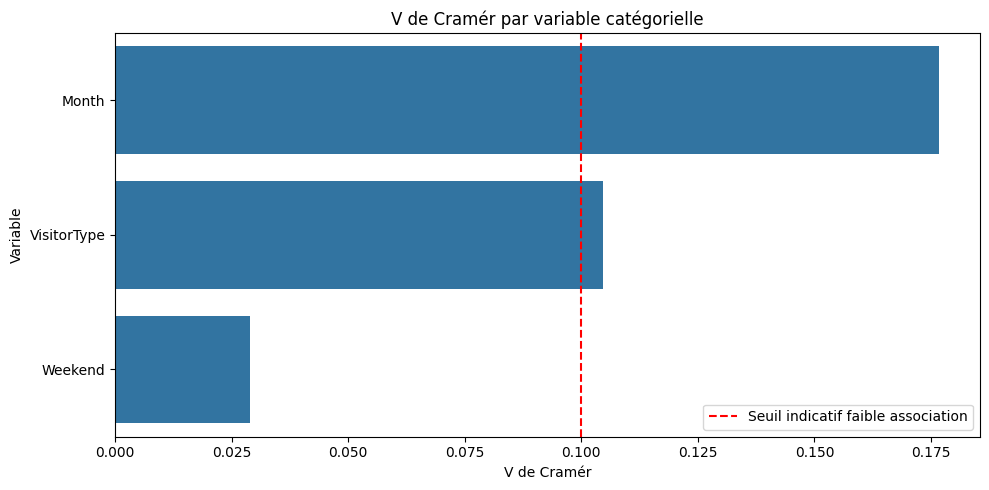

In [15]:
# Exemple : analyse entre toutes les variables qualitatives et 'Revenue'
res_qual = analyse_qualitatives_vs_cible(df, cible='Revenue')


# Etape 5:  Modélisation
- Choisir un ou plusieurs algorithmes adaptés (logistic regression, SVM, arbre, etc.).
- Séparer les données en ensembles d’entraînement et de test (train/test split).
- Entraîner les modèles sur les données d’apprentissage.

In [16]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Séparation X (features) / y (cible)
X = df.drop(columns=['Revenue'])  # Remplacez 'Revenue' par le nom de votre cible si différent
y = df['Revenue']

# Encodage des variables catégorielles
X = pd.get_dummies(X, drop_first=True)

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:

# Entraînement du modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Évaluation du modèle¶
- Mesurer les performances : accuracy, precision, recall, F1-score, AUC, etc.
- Comparer plusieurs modèles ou variantes.
- Détecter les éventuels sur/apprentissages (overfitting/underfitting).

In [18]:

# Prédictions sur train et test
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Probabilités pour les courbes ROC
y_proba_train = model.predict_proba(X_train)[:, 1]
y_proba_test = model.predict_proba(X_test)[:, 1]

# Évaluation classique
print("=== ÉVALUATION TRAIN ===")
print(classification_report(y_train, y_pred_train))
print("Accuracy :", accuracy_score(y_train, y_pred_train))
print()


=== ÉVALUATION TRAIN ===
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8338
        True       1.00      1.00      1.00      1526

    accuracy                           1.00      9864
   macro avg       1.00      1.00      1.00      9864
weighted avg       1.00      1.00      1.00      9864

Accuracy : 1.0



In [19]:

print("=== ÉVALUATION TEST ===")
print(classification_report(y_test, y_pred_test))
print("Accuracy :", accuracy_score(y_test, y_pred_test))




=== ÉVALUATION TEST ===
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2084
        True       0.73      0.54      0.62       382

    accuracy                           0.90      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.89      0.90      0.89      2466

Accuracy : 0.8978102189781022


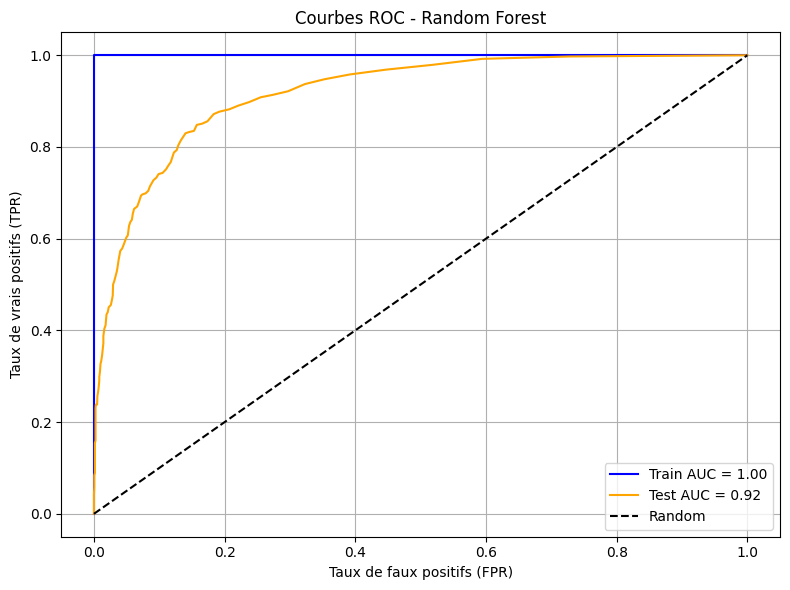

In [20]:
# Courbes ROC
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)

auc_train = roc_auc_score(y_train, y_proba_train)
auc_test = roc_auc_score(y_test, y_proba_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

=== XGBoost - ÉVALUATION TRAIN ===
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      8338
        True       0.99      0.93      0.96      1526

    accuracy                           0.99      9864
   macro avg       0.99      0.97      0.98      9864
weighted avg       0.99      0.99      0.99      9864

Accuracy : 0.9879359286293593
ROC AUC Score: 0.998634447540308

=== XGBoost - ÉVALUATION TEST ===
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      2084
        True       0.67      0.60      0.64       382

    accuracy                           0.89      2466
   macro avg       0.80      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466

Accuracy : 0.8933495539334956
ROC AUC Score: 0.9166122338233964


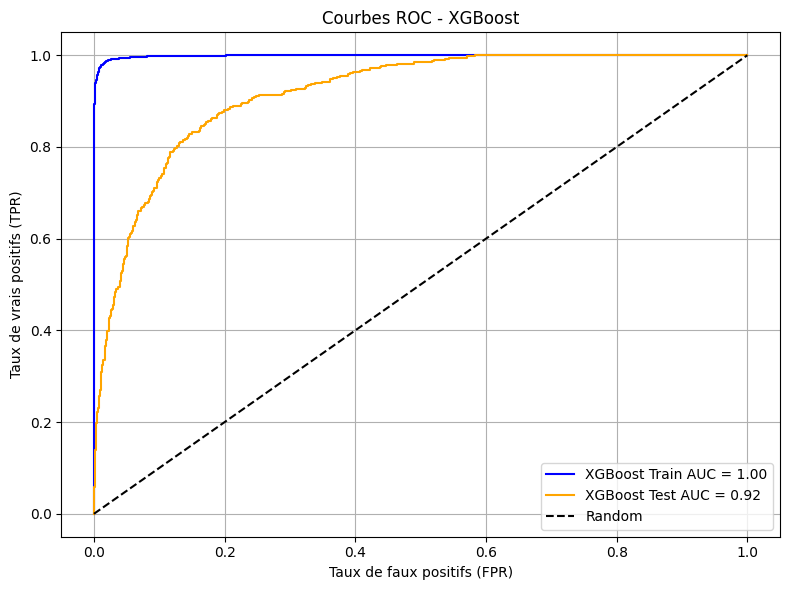

In [23]:
# prompt: Donne moi les métriques de performance sur le modèle de XG Boost

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import xgboost as xgb

# Assuming X_train, X_test, y_train, y_test are already defined from previous code

# Initialize and train the XGBoost model
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_train_xgb = model_xgb.predict(X_train)
y_pred_test_xgb = model_xgb.predict(X_test)

# Predict probabilities for ROC curve
y_proba_train_xgb = model_xgb.predict_proba(X_train)[:, 1]
y_proba_test_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Evaluate the model
print("=== XGBoost - ÉVALUATION TRAIN ===")
print(classification_report(y_train, y_pred_train_xgb))
print("Accuracy :", accuracy_score(y_train, y_pred_train_xgb))
print("ROC AUC Score:", roc_auc_score(y_train, y_proba_train_xgb))

print("\n=== XGBoost - ÉVALUATION TEST ===")
print(classification_report(y_test, y_pred_test_xgb))
print("Accuracy :", accuracy_score(y_test, y_pred_test_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_test_xgb))


# ROC Curve
fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train, y_proba_train_xgb)
fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_proba_test_xgb)

auc_train_xgb = roc_auc_score(y_train, y_proba_train_xgb)
auc_test_xgb = roc_auc_score(y_test, y_proba_test_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_xgb, tpr_train_xgb, label=f'XGBoost Train AUC = {auc_train_xgb:.2f}', color='blue')
plt.plot(fpr_test_xgb, tpr_test_xgb, label=f'XGBoost Test AUC = {auc_test_xgb:.2f}', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC - XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
import joblib

# Sauvegarde du modèle dans un fichier
joblib.dump(model, 'modele_random_forest.joblib')
print("Modèle sauvegardé dans 'modele_random_forest.joblib'")


Modèle sauvegardé dans 'modele_random_forest.joblib'


In [28]:
import pandas as pd
import joblib

# Charger le modèle Random Forest
model = joblib.load("modele_random_forest.joblib")  # Assurez-vous que ce fichier existe

# Charger la base à prédire
df_input = pd.read_csv("/sample_api_data.csv")  # Remplacez par le chemin de votre fichier CSV

# Encodage des variables catégorielles
X_encoded = pd.get_dummies(df_input)

# S'assurer que les colonnes correspondent à celles utilisées lors de l'entraînement
model_features = model.feature_names_in_

for col in model_features:
    if col not in X_encoded.columns:
        X_encoded[col] = 0  # Ajouter les colonnes manquantes
X_encoded = X_encoded[model_features]  # Réorganiser dans le bon ordre

# Prédictions
df_input["prediction"] = model.predict(X_encoded)
df_input["probabilite_achat"] = model.predict_proba(X_encoded)[:, 1].round(4)

# Sauvegarder le fichier enrichi
df_input.to_csv("sample_api_data_with_predictions.csv", index=False)

print("✅ Fichier sauvegardé : sample_api_data_with_predictions.csv")

✅ Fichier sauvegardé : sample_api_data_with_predictions.csv


In [29]:
df_input

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,prediction,probabilite_achat
0,2,70.79,0,44.96,11,460.86,0.015,0.223,12.59,0.2,Mar,5,4,9,10,Returning_Visitor,False,False,0.38
1,3,45.88,1,17.58,5,88.75,0.034,0.158,14.41,0.6,May,6,9,1,2,New_Visitor,True,False,0.40
2,4,68.69,0,20.20,16,79.26,0.161,0.046,2.31,0.0,May,7,6,9,7,Other,False,False,0.16
3,4,16.94,0,1.52,19,380.45,0.085,0.203,0.44,0.0,May,7,12,9,14,Returning_Visitor,False,False,0.12
4,4,24.28,1,46.59,7,73.11,0.012,0.098,0.68,0.2,Mar,7,12,9,13,Other,False,False,0.17
5,2,10.42,2,48.71,23,493.86,0.120,0.017,2.64,0.0,Feb,2,2,3,12,Other,True,False,0.31
6,3,90.94,1,1.30,3,100.11,0.072,0.129,2.96,0.6,May,1,2,1,20,Returning_Visitor,True,False,0.16
7,0,40.04,1,11.67,24,557.78,0.038,0.074,4.82,0.4,Jan,3,7,8,17,New_Visitor,True,False,0.29
8,5,17.26,1,15.60,28,248.83,0.138,0.237,1.87,0.6,May,6,9,6,18,Other,False,False,0.16
9,1,17.74,2,14.48,27,62.94,0.071,0.159,3.13,0.6,Jan,6,2,2,1,Other,True,False,0.21


## 📁 Structuration du projet

- Bien commenter chaque cellule
- Ajouter un README expliquant le projet
- Publier sur GitHub avec une description claire

🎉 Bravo pour avoir terminé ce mini-projet !